In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline 

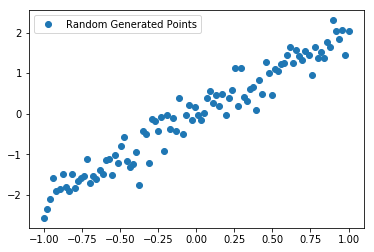

In [2]:
train_x = np.linspace(-1, 1, 100)
train_y = 2 *  train_x + np.random.randn(*train_x.shape) * 0.3
plt.plot(train_x, train_y, 'o', label = 'Random Generated Points')
plt.legend()
plt.show()

In [3]:
# input and output
X = tf.placeholder("float")
Y = tf.placeholder("float")

# parameters
W = tf.Variable(tf.random_normal([1]), name = 'weight')
B = tf.Variable(tf.zeros([1]), name = 'bias')

# forward propagation
Z = tf.multiply(X, W) + B

# back propagation
cost = tf.reduce_mean(tf.square(Y - Z))

learning_rate = 0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

Epoch:  1   cost:  0.9382975      W:  [0.64580363] b:  [0.38667595]
Epoch:  2   cost:  0.3491113      W:  [1.3077316] b:  [0.23452236]
Epoch:  3   cost:  0.16197717      W:  [1.6616815] b:  [0.11190902]
Epoch:  4   cost:  0.109813936      W:  [1.8439162] b:  [0.0436914]
Epoch:  5   cost:  0.09544013      W:  [1.9368738] b:  [0.00824177]
Epoch:  6   cost:  0.09134341      W:  [1.9841802] b:  [-0.00988296]
Epoch:  7   cost:  0.09009561      W:  [2.0082397] b:  [-0.01911195]
Epoch:  8   cost:  0.08967738      W:  [2.0204751] b:  [-0.02380675]
Epoch:  9   cost:  0.08952066      W:  [2.0266974] b:  [-0.02619431]
Epoch:  10   cost:  0.08945546      W:  [2.0298603] b:  [-0.02740818]
Epoch:  11   cost:  0.08942604      W:  [2.031469] b:  [-0.02802568]
Epoch:  12   cost:  0.08941204      W:  [2.032287] b:  [-0.02833928]
Epoch:  13   cost:  0.08940519      W:  [2.0327034] b:  [-0.02849917]
Epoch:  14   cost:  0.08940173      W:  [2.0329154] b:  [-0.02858048]
Epoch:  15   cost:  0.08940001      W

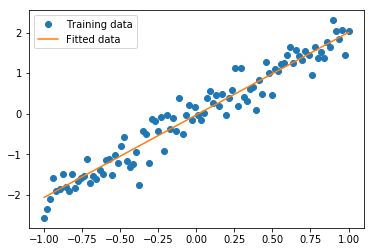

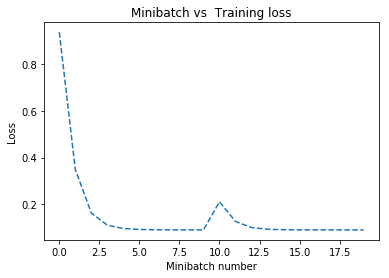

In [11]:
init = tf.global_variables_initializer()
training_epochs = 20

def moving_average(a, w=10):
    if len(a) < w:
        return a[:]
    return [val if idx < w else sum(a[(idx-w):idx])/w for idx, val in enumerate(a)]


with tf.Session() as sess:
    sess.run(init)
    plotdata = {"Epoch":[], "loss":[]}
    for epoch in range(training_epochs):
        for (x,y) in zip(train_x, train_y):
            sess.run(optimizer, feed_dict={X:x, Y:y})
            
        loss = sess.run(cost, feed_dict={X:train_x, Y:train_y})
        print("Epoch: ", epoch+1, "  cost: ", loss, "     W: ", sess.run(W), "b: ", sess.run(B))
        
        if not (loss == "NA"):
            plotdata["batch_size"].append(epoch)
            plotdata["loss"].append(loss)
    
    print("Finished!")
    print("cost: ", sess.run(cost, feed_dict={X:train_x, Y:train_y}), "W: ", sess.run(W), "b: ", sess.run(B))
    


    plt.plot(train_x, train_y, 'o', label = 'Training data')
    plt.plot(train_x, sess.run(W) * train_x + sess.run(B), label = 'Fitted data')
    plt.legend()
    plt.show()
    
    plt.figure(1)
    plt.plot(plotdata['batch_size'], moving_average(plotdata['loss']), '--')
    plt.xlabel('Minibatch number')
    plt.ylabel('Loss')
    plt.title('Minibatch vs  Training loss')
    